In [1]:
import os
from os.path import join as pj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Statistics
from evaluation.classification.statistics import get_precisions, get_average_precision

In [2]:
resnet50_not_pretrain_root_path = pj(os.getcwd(), "figure/classification/master_paper/resnet50/b20_lr1e-5/crossvalid_20200806_not_pretrain")
resnet50_freeze_root_path = pj(os.getcwd(), "figure/classification/master_paper/resnet50/b20_lr1e-5/crossvalid_20200806_freeze")
resnet50_root_path = pj(os.getcwd(), "figure/classification/master_paper/resnet50/b20_lr1e-5/crossvalid_20200806")
resnet50_OS_root_path = pj(os.getcwd(), "figure/classification/master_paper/resnet50/b20_lr1e-5/crossvalid_20200806_OS")
resnet50_all56_root_path = pj(os.getcwd(), "figure/classification/master_paper/resnet50/b20_lr1e-5/crossvalid_20200806_All5to6")
resnet50_OS_all56_root_path = pj(os.getcwd(), "figure/classification/master_paper/resnet50/b20_lr1e-5/crossvalid_20200806_OS_All5to6")
resnet50_OS_AugScale_root_path = pj(os.getcwd(), "figure/classification/master_paper/resnet50/b20_lr1e-5/crossvalid_20200806_OS_aug_scale")
resnet50_OS_all56_AugScale_root_path = pj(os.getcwd(), "figure/classification/master_paper/resnet50/b20_lr1e-5/crossvalid_20200806_OS_All5to6_aug_scale")
resnet50_OS_all56withResize_root_path = pj(os.getcwd(), "figure/classification/master_paper/resnet50/b20_lr1e-5/crossvalid_20200806_OS_All5to6withResize")
resnet50_OS_all56_FC_root_path = pj(os.getcwd(), "figure/classification/master_paper/resnet50/b20_lr1e-5/crossvalid_20200806_OS_All5to6_concat")

### mean Average Precision

In [3]:
resnet50_not_pretrain = pd.read_csv(pj(resnet50_not_pretrain_root_path, "validation_matrix.csv"))
resnet50_freeze = pd.read_csv(pj(resnet50_freeze_root_path, "validation_matrix.csv"))
resnet50 = pd.read_csv(pj(resnet50_root_path, "validation_matrix.csv"))
resnet50_OS = pd.read_csv(pj(resnet50_OS_root_path, "validation_matrix.csv"))
resnet50_all56 = pd.read_csv(pj(resnet50_all56_root_path, "validation_matrix.csv"))
resnet50_OS_all56 = pd.read_csv(pj(resnet50_OS_all56_root_path, "validation_matrix.csv"))
resnet50_OS_AugScale = pd.read_csv(pj(resnet50_OS_all56_AugScale_root_path, "validation_matrix.csv"))
resnet50_OS_all56_AugScale = pd.read_csv(pj(resnet50_OS_all56_AugScale_root_path, "validation_matrix.csv"))
resnet50_OS_all56withResize = pd.read_csv(pj(resnet50_OS_all56withResize_root_path, "validation_matrix.csv"))
resnet50_OS_all56_FC = pd.read_csv(pj(resnet50_OS_all56_FC_root_path, "validation_matrix.csv"))

In [4]:
exp_df = [resnet50_not_pretrain,
          resnet50_freeze,
          resnet50,
          resnet50_OS,
          resnet50_all56,
          resnet50_OS_all56,
          resnet50_OS_AugScale,
          resnet50_OS_all56_AugScale,
          resnet50_OS_all56withResize,
          resnet50_OS_all56_FC
         ]
exp_name = ["resnet50_not_pretrain",
            "resnet50_freeze", 
            "resnet50", 
            "resnet50_OS", 
            "resnet50_all56", 
            "resnet50_OS_all56", 
            "resnet50_OS_AugScale", 
            "resnet50_OS_all56_AugScale", 
            "resnet50_OS_all56withResize", 
            "resnet50_OS_all56_FC", 
           ]
exp_precision = [get_precisions(elem_df) for elem_df in exp_df]
exp_mAP = [elem_precision.mean() for elem_precision in exp_precision]

In [5]:
df = pd.DataFrame({"mAP": exp_mAP})
df.index = exp_name
df

,mAP
resnet50_not_pretrain,0.536404
resnet50_freeze,0.553538
resnet50,0.835519
resnet50_OS,0.837902
resnet50_all56,0.897009
resnet50_OS_all56,0.911029
resnet50_OS_AugScale,0.903583
resnet50_OS_all56_AugScale,0.903583
resnet50_OS_all56withResize,0.910707
resnet50_OS_all56_FC,0.901970


### Average Precision

In [6]:
exp_AP = [get_average_precision(elem_df) for elem_df in exp_df]

In [7]:
df = pd.DataFrame({"AP": exp_AP})
df.index = exp_name
df

,AP
resnet50_not_pretrain,0.619313
resnet50_freeze,0.683470
resnet50,0.870376
resnet50_OS,0.874632
resnet50_all56,0.917185
resnet50_OS_all56,0.921768
resnet50_OS_AugScale,0.917512
resnet50_OS_all56_AugScale,0.917512
resnet50_OS_all56withResize,0.925368
resnet50_OS_all56_FC,0.918494


### Precision

In [8]:
insect_names = ['Diptera', 'Ephemeridae', 'Ephemeroptera', 'Lepidoptera', 'Plecoptera', 'Trichoptera']

In [9]:
data_dict = {}
for name, precision in zip(exp_name, exp_precision):
    data_dict.update({name: precision})

In [10]:
df = pd.DataFrame(data_dict)
df.index = insect_names
df

,resnet50_not_pretrain,resnet50_freeze,resnet50,resnet50_OS,resnet50_all56,resnet50_OS_all56,resnet50_OS_AugScale,resnet50_OS_all56_AugScale,resnet50_OS_all56withResize,resnet50_OS_all56_FC
Diptera,0.681188,0.798020,0.912871,0.904950,0.946535,0.950495,0.952475,0.952475,0.944554,0.932673
Ephemeridae,0.608392,0.314685,0.867133,0.825175,0.944056,0.944056,0.909091,0.909091,0.937063,0.923077
Ephemeroptera,0.259386,0.269625,0.655290,0.686007,0.764505,0.839590,0.846416,0.846416,0.846416,0.808874
Lepidoptera,0.824547,0.892916,0.943163,0.942339,0.961285,0.948929,0.943987,0.943987,0.962932,0.954695
Plecoptera,0.466531,0.596349,0.833671,0.845842,0.922921,0.898580,0.904665,0.904665,0.898580,0.900609
Trichoptera,0.378378,0.449631,0.800983,0.823096,0.842752,0.884521,0.864865,0.864865,0.874693,0.891892


### Error Analysis

### --- size distribution and Average Precision ---

In [11]:
each_size_df = pd.read_csv(pj(resnet50_not_pretrain_root_path, "each_size_df.csv"))
each_size_df["exponent"] = each_size_df["Insect_size"].apply(lambda x: np.floor(np.log2(x)))
insect_size = np.asarray(each_size_df["exponent"])
idx, count = np.unique(insect_size, return_counts=True)
insect_size_df = pd.DataFrame({"exponent": idx, "count": count})
insect_size_df = insect_size_df.drop(insect_size_df.index[[0, 1]])
insect_size_df

,exponent,count
2,7.0,12
3,8.0,51
4,9.0,131
5,10.0,403
6,11.0,1004
7,12.0,740
8,13.0,431
9,14.0,260
10,15.0,21


In [12]:
resnet50_not_pretrain = pd.read_csv(pj(resnet50_not_pretrain_root_path, "all_size_df.csv"))
resnet50_freeze = pd.read_csv(pj(resnet50_freeze_root_path, "all_size_df.csv"))
resnet50 = pd.read_csv(pj(resnet50_root_path, "all_size_df.csv"))
resnet50_OS = pd.read_csv(pj(resnet50_OS_root_path, "all_size_df.csv"))
resnet50_all56 = pd.read_csv(pj(resnet50_all56_root_path, "all_size_df.csv"))
resnet50_OS_all56 = pd.read_csv(pj(resnet50_OS_all56_root_path, "all_size_df.csv"))
resnet50_OS_AugScale = pd.read_csv(pj(resnet50_OS_AugScale_root_path, "all_size_df.csv"))
resnet50_OS_all56_AugScale = pd.read_csv(pj(resnet50_OS_all56_AugScale_root_path, "all_size_df.csv"))
resnet50_OS_all56withResize = pd.read_csv(pj(resnet50_OS_all56withResize_root_path, "all_size_df.csv"))
resnet50_OS_all56_FC = pd.read_csv(pj(resnet50_OS_all56_FC_root_path, "all_size_df.csv"))

In [13]:
exp_df = [resnet50_not_pretrain,
          resnet50_freeze,
          resnet50,
          resnet50_OS,
          resnet50_all56,
          resnet50_OS_all56,
          resnet50_OS_AugScale,
          resnet50_OS_all56_AugScale,
          resnet50_OS_all56withResize,
          resnet50_OS_all56_FC
         ]
exp_each_size_ap = [elem_df.drop(elem_df.index[[0, 1]]) for elem_df in exp_df]

In [14]:
data_dict = {
    "exponent": insect_size_df["exponent"],
    "count": insect_size_df["count"],
}
for name, each_size_ap in zip(exp_name, exp_each_size_ap):
    data_dict.update({name: each_size_ap["Accuracy"]})

In [15]:
df = pd.DataFrame(data_dict)
df

,exponent,count,resnet50_not_pretrain,resnet50_freeze,resnet50,resnet50_OS,resnet50_all56,resnet50_OS_all56,resnet50_OS_AugScale,resnet50_OS_all56_AugScale,resnet50_OS_all56withResize,resnet50_OS_all56_FC
2,7.0,12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.916667,1.000000,1.000000
3,8.0,51,0.784314,0.725490,0.862745,0.901961,0.882353,0.882353,0.823529,0.843137,0.882353,0.862745
4,9.0,131,0.541985,0.473282,0.732824,0.763359,0.854962,0.839695,0.824427,0.793893,0.809160,0.832061
5,10.0,403,0.342432,0.476427,0.774194,0.761787,0.846154,0.843672,0.791563,0.856079,0.878412,0.856079
6,11.0,1004,0.529880,0.647410,0.841633,0.852590,0.894422,0.904382,0.885458,0.904382,0.912351,0.901394
7,12.0,740,0.712162,0.732432,0.912162,0.913514,0.943243,0.945946,0.936486,0.941892,0.947297,0.940541
8,13.0,431,0.758701,0.800464,0.939675,0.941995,0.976798,0.983759,0.965197,0.969838,0.967517,0.976798
9,14.0,260,0.876923,0.888462,0.969231,0.969231,0.980769,0.988462,0.973077,0.984615,0.984615,0.980769
10,15.0,21,0.809524,0.809524,0.857143,0.809524,0.952381,0.952381,0.952381,1.000000,0.952381,0.904762


### (1) Compare Transfer Learning

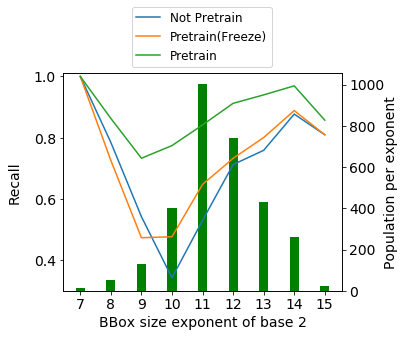

In [16]:
plt.rcParams["font.size"] = 14
fig, ax1 = plt.subplots(figsize=(5,4))
ax2 = ax1.twinx()

x_label = ["7", "8", "9", "10", "11", "12", "13", "14", "15"]

ax1.bar(x_label, df["count"], width=0.3, color="g")
ax2.plot(x_label, df["resnet50_not_pretrain"], label="Not Pretrain")
ax2.plot(x_label, df["resnet50_freeze"], label="Pretrain(Freeze)")
ax2.plot(x_label, df["resnet50"], label="Pretrain")
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h2, l2, bbox_to_anchor=(0.77, 1.0), loc='lower right', fontsize=12)

ax1.set_xlabel("BBox size exponent of base 2", fontsize=14)
ax1.set_ylabel("Recall", fontsize=14)
ax1.yaxis.set_label_coords(-0.15, 0.5)
ax1.grid(False)
ax2.set_ylabel("Population per exponent", fontsize=14)
ax2.set_ylim(0.3, 1.01)
ax2.yaxis.set_label_coords(1.15, 0.5)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/master_paper/classification/compare_method/comp_TL_from_size_dist.png", bbox_inches="tight")

### (2) Compare OverSampling + RandomAug

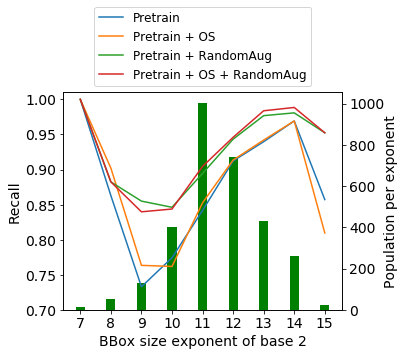

In [17]:
plt.rcParams["font.size"] = 14
fig, ax1 = plt.subplots(figsize=(5,4))
ax2 = ax1.twinx()

x_label = ["7", "8", "9", "10", "11", "12", "13", "14", "15"]

ax1.bar(x_label, df["count"], width=0.3, color="g")
ax2.plot(x_label, df["resnet50"], label="Pretrain")
ax2.plot(x_label, df["resnet50_OS"], label="Pretrain + OS")
ax2.plot(x_label, df["resnet50_all56"], label="Pretrain + RandomAug")
ax2.plot(x_label, df["resnet50_OS_all56"], label="Pretrain + OS + RandomAug")
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h2, l2, bbox_to_anchor=(0.91, 1.0), loc='lower right', fontsize=12)

ax1.set_xlabel("BBox size exponent of base 2", fontsize=14)
ax1.set_ylabel("Recall", fontsize=14)
ax1.yaxis.set_label_coords(-0.15, 0.5)
ax1.grid(False)
ax2.set_ylabel("Population per exponent", fontsize=14)
ax2.set_ylim(0.7, 1.01)
ax2.yaxis.set_label_coords(1.15, 0.5)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/master_paper/classification/compare_method/comp_OSplusRandomAug_from_size_dist.png", bbox_inches="tight")

### (3) Compare Augmentation

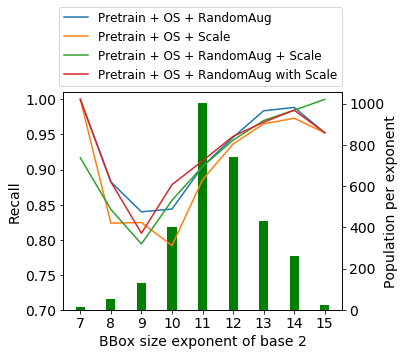

In [18]:
plt.rcParams["font.size"] = 14
fig, ax1 = plt.subplots(figsize=(5,4))
ax2 = ax1.twinx()

x_label = ["7", "8", "9", "10", "11", "12", "13", "14", "15"]

ax1.bar(x_label, df["count"], width=0.3, color="g")
ax2.plot(x_label, df["resnet50_OS_all56"], label="Pretrain + OS + RandomAug")
ax2.plot(x_label, df["resnet50_OS_AugScale"], label="Pretrain + OS + Scale")
ax2.plot(x_label, df["resnet50_OS_all56_AugScale"], label="Pretrain + OS + RandomAug + Scale")
ax2.plot(x_label, df["resnet50_OS_all56withResize"], label="Pretrain + OS + RandomAug with Scale")
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h2, l2, bbox_to_anchor=(1.02, 1.0), loc='lower right', fontsize=12)

ax1.set_xlabel("BBox size exponent of base 2", fontsize=14)
ax1.set_ylabel("Recall", fontsize=14)
ax1.yaxis.set_label_coords(-0.15, 0.5)
ax1.grid(False)
ax2.set_ylabel("Population per exponent", fontsize=14)
ax2.set_ylim(0.7, 1.01)
ax2.yaxis.set_label_coords(1.15, 0.5)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/master_paper/classification/compare_method/comp_Aug_from_size_dist.png", bbox_inches="tight")

### Compare Parameter

In [19]:
resnet50_all01_root_path = pj(os.getcwd(), "figure/classification/master_paper/resnet50/b20_lr1e-5/crossvalid_20200806_OS_All0to1")
resnet50_all12_root_path = pj(os.getcwd(), "figure/classification/master_paper/resnet50/b20_lr1e-5/crossvalid_20200806_OS_All1to2")
resnet50_all23_root_path = pj(os.getcwd(), "figure/classification/master_paper/resnet50/b20_lr1e-5/crossvalid_20200806_OS_All2to3")
resnet50_all34_root_path = pj(os.getcwd(), "figure/classification/master_paper/resnet50/b20_lr1e-5/crossvalid_20200806_OS_All3to4")
resnet50_all45_root_path = pj(os.getcwd(), "figure/classification/master_paper/resnet50/b20_lr1e-5/crossvalid_20200806_OS_All4to5")
resnet50_all56_root_path = pj(os.getcwd(), "figure/classification/master_paper/resnet50/b20_lr1e-5/crossvalid_20200806_OS_All5to6")
resnet50_all67_root_path = pj(os.getcwd(), "figure/classification/master_paper/resnet50/b20_lr1e-5/crossvalid_20200806_OS_All6to7")
resnet50_all78_root_path = pj(os.getcwd(), "figure/classification/master_paper/resnet50/b20_lr1e-5/crossvalid_20200806_OS_All7to8")
resnet50_all89_root_path = pj(os.getcwd(), "figure/classification/master_paper/resnet50/b20_lr1e-5/crossvalid_20200806_OS_All8to9")

In [20]:
resnet50_all01 = pd.read_csv(pj(resnet50_all01_root_path, "validation_matrix.csv"))
resnet50_all12 = pd.read_csv(pj(resnet50_all12_root_path, "validation_matrix.csv"))
resnet50_all23 = pd.read_csv(pj(resnet50_all23_root_path, "validation_matrix.csv"))
resnet50_all34 = pd.read_csv(pj(resnet50_all34_root_path, "validation_matrix.csv"))
resnet50_all45 = pd.read_csv(pj(resnet50_all45_root_path, "validation_matrix.csv"))
resnet50_all56 = pd.read_csv(pj(resnet50_all56_root_path, "validation_matrix.csv"))
resnet50_all67 = pd.read_csv(pj(resnet50_all67_root_path, "validation_matrix.csv"))
resnet50_all78 = pd.read_csv(pj(resnet50_all78_root_path, "validation_matrix.csv"))
resnet50_all89 = pd.read_csv(pj(resnet50_all89_root_path, "validation_matrix.csv"))

In [21]:
exp_df = [resnet50_all01,
          resnet50_all12,
          resnet50_all23,
          resnet50_all34,
          resnet50_all45,
          resnet50_all56,
          resnet50_all67,
          resnet50_all78,
          resnet50_all89,
         ]
exp_name = ["resnet50_all01",
            "resnet50_all12",
            "resnet50_all23",
            "resnet50_all34",
            "resnet50_all45",
            "resnet50_all56",
            "resnet50_all67",
            "resnet50_all78",
            "resnet50_all89",
           ]
exp_precision = [get_precisions(elem_df) for elem_df in exp_df]
exp_ap = [elem_precision.mean() for elem_precision in exp_precision]

In [22]:
df = pd.DataFrame({"mAP": exp_ap})
df.index = exp_name
df

,mAP
resnet50_all01,0.877197
resnet50_all12,0.895393
resnet50_all23,0.893598
resnet50_all34,0.901536
resnet50_all45,0.903859
resnet50_all56,0.911029
resnet50_all67,0.903058
resnet50_all78,0.902358
resnet50_all89,0.904126


In [23]:
exp_AP = [get_average_precision(elem_df) for elem_df in exp_df]

In [24]:
df = pd.DataFrame({"AP": exp_AP})
df.index = exp_name
df

,AP
resnet50_all01,0.902455
resnet50_all12,0.911620
resnet50_all23,0.914566
resnet50_all34,0.920458
resnet50_all45,0.920786
resnet50_all56,0.921768
resnet50_all67,0.919149
resnet50_all78,0.916858
resnet50_all89,0.914894


### Additional Experiment

In [25]:
resnet50_all56_NormWithSize_root_path = pj(os.getcwd(), "figure/classification/master_paper/resnet50/b20_lr1e-5/crossvalid_20200806_All5to6_NormWithSize")
resnet50_OS_all56_NormWithSize_root_path = pj(os.getcwd(), "figure/classification/master_paper/resnet50/b20_lr1e-5/crossvalid_20200806_OS_All5to6_NormWithSize")
resnet50_OS_all56_exp_root_path = pj(os.getcwd(), "figure/classification/master_paper/resnet50/b20_lr1e-5/crossvalid_20200806_OS_All5to6_exp")
resnet50_OS_all56_KD_root_path = pj(os.getcwd(), "figure/classification/master_paper/resnet50/b20_lr1e-5/crossvalid_20200806_OS_All5to6_KD")
resnet50_OS_all56withJigsaw_root_path = pj(os.getcwd(), "figure/classification/master_paper/resnet50/b20_lr1e-5/crossvalid_20200806_OS_All5to6withJigsaw")

In [26]:
resnet50_all56_NormWithSize = pd.read_csv(pj(resnet50_all56_NormWithSize_root_path, "validation_matrix.csv"))
resnet50_OS_all56_NormWithSize = pd.read_csv(pj(resnet50_OS_all56_NormWithSize_root_path, "validation_matrix.csv"))
resnet50_OS_all56_exp = pd.read_csv(pj(resnet50_OS_all56_exp_root_path, "validation_matrix.csv"))
resnet50_OS_all56_KD = pd.read_csv(pj(resnet50_OS_all56_KD_root_path, "validation_matrix.csv"))
resnet50_OS_all56withJigsaw = pd.read_csv(pj(resnet50_OS_all56withJigsaw_root_path, "validation_matrix.csv"))

In [27]:
exp_df = [resnet50_all56_NormWithSize,
          resnet50_OS_all56_NormWithSize,
          resnet50_OS_all56_exp,
          resnet50_OS_all56_KD,
          resnet50_OS_all56withJigsaw,
         ]
exp_name = ["resnet50_all56_NormWithSize",
            "resnet50_OS_all56_NormWithSize",
            "resnet50_OS_all56_exp",
            "resnet50_OS_all56_KD",
            "resnet50_OS_all56withJigsaw",
           ]
exp_precision = [get_precisions(elem_df) for elem_df in exp_df]
exp_ap = [elem_precision.mean() for elem_precision in exp_precision]

In [28]:
df = pd.DataFrame({"mAP": exp_ap})
df.index = exp_name
df

,mAP
resnet50_all56_NormWithSize,0.895588
resnet50_OS_all56_NormWithSize,0.909232
resnet50_OS_all56_exp,0.906935
resnet50_OS_all56_KD,0.911711
resnet50_OS_all56withJigsaw,0.907784


In [29]:
exp_AP = [get_average_precision(elem_df) for elem_df in exp_df]

In [30]:
df = pd.DataFrame({"AP": exp_AP})
df.index = exp_name
df

,AP
resnet50_all56_NormWithSize,0.913584
resnet50_OS_all56_NormWithSize,0.921440
resnet50_OS_all56_exp,0.918494
resnet50_OS_all56_KD,0.923077
resnet50_OS_all56withJigsaw,0.922422
